# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Load the Data

In [3]:
train_data = pd.read_csv('/Users/vishal/Desktop/CSV files/carInsurance_train.csv')
test_data = pd.read_csv('/Users/vishal/Desktop/CSV files/carInsurance_test.csv')

In [5]:
train_data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [7]:
test_data.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17:17:42,17:18:06,NaN
1,4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,09:13:44,09:14:37,NaN
2,4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15:24:07,15:25:51,NaN
3,4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,09:43:44,09:48:01,NaN
4,4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,16:31:51,16:34:22,NaN


#  Data Cleaning

In [12]:
# Handle missing values in training data
train_data['Job'].fillna('unknown', inplace=True)
train_data['Education'].fillna('unknown', inplace=True)
train_data['Communication'].fillna('unknown', inplace=True)

# Handle missing values in test data
test_data['Job'].fillna('unknown', inplace=True)
test_data['Education'].fillna('unknown', inplace=True)
test_data['Communication'].fillna('unknown', inplace=True)

# Create a new feature for call duration
def calculate_call_duration(start, end):
    start_time = pd.to_datetime(start, format='%H:%M:%S')
    end_time = pd.to_datetime(end, format='%H:%M:%S')
    duration = (end_time - start_time).seconds
    return duration

train_data['CallDuration'] = train_data.apply(lambda row: calculate_call_duration(row['CallStart'], row['CallEnd']), axis=1)
test_data['CallDuration'] = test_data.apply(lambda row: calculate_call_duration(row['CallStart'], row['CallEnd']), axis=1)

# Drop unnecessary columns
train_data.drop(['Id', 'CallStart', 'CallEnd'], axis=1, inplace=True)
test_data.drop(['Id', 'CallStart', 'CallEnd', 'CarInsurance'], axis=1, inplace=True)


# Encode Categorical Features

In [15]:
categorical_cols = ['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']

# Use LabelEncoder for simplicity
encoder = LabelEncoder()
for col in categorical_cols:
    train_data[col] = encoder.fit_transform(train_data[col])
    test_data[col] = encoder.transform(test_data[col])


# Split Data for Training and Validation

In [18]:
# Features and target
X = train_data.drop('CarInsurance', axis=1)
y = train_data['CarInsurance']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



# Scale Numerical Features

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test_data_scaled = scaler.transform(test_data)


# Build and Train Logistic Regression Model

In [25]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

# Validate the Model

In [27]:
# Predictions on validation set
y_pred = model.predict(X_val)

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("\nAccuracy Score:", accuracy_score(y_val, y_pred))


Confusion Matrix:
[[420  64]
 [102 214]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       484
           1       0.77      0.68      0.72       316

    accuracy                           0.79       800
   macro avg       0.79      0.77      0.78       800
weighted avg       0.79      0.79      0.79       800


Accuracy Score: 0.7925


# Make Predictions on Test Data

In [30]:
# Predictions for test data
test_predictions = model.predict(test_data_scaled)

# Save predictions to a CSV
output = pd.DataFrame({'Id': range(4001, 5001), 'CarInsurance': test_predictions})
output.to_csv('carInsurance_predictions.csv', index=False)
print("Predictions saved to carInsurance_predictions.csv")


Predictions saved to carInsurance_predictions.csv


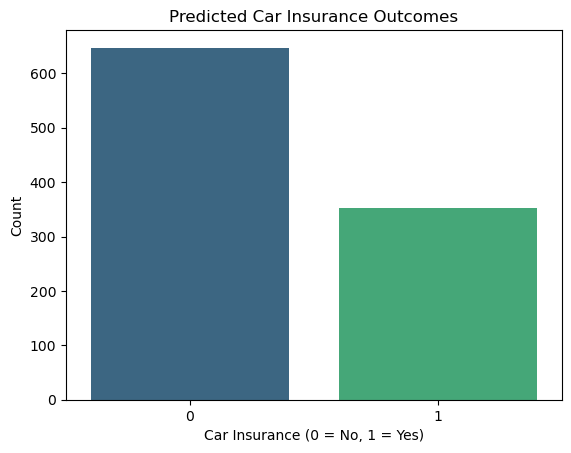

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions for test data
test_predictions = model.predict(test_data_scaled)

# Create a DataFrame for visualization
output = pd.DataFrame({'CarInsurance': test_predictions})

# Plot the distribution of predictions
sns.countplot(x='CarInsurance', data=output, palette='viridis')
plt.title('Predicted Car Insurance Outcomes')
plt.xlabel('Car Insurance (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


# Outcome

# Distribution of Predictions:

## The bar chart visually represents the count of predictions for each class:
### 0 (No): Customers predicted not to buy car insurance.
### 1 (Yes): Customers predicted to buy car insurance.


### Balance in Predictions:

### The plot shows whether the model predicts both outcomes (0 and 1) fairly evenly or if it skews towards one.
## Insights for Marketing:

### If most predictions are 1 (Yes), the marketing campaign might be effective for the test group.
### If most predictions are 0 (No), additional strategies might be required to target these customers.


## Actionable Steps:

### Customers predicted as 1 can be prioritized for follow-up.
### Customers predicted as 0 may require a tailored marketing approach to increase conversion chances.


## Validation:

### The plot can also serve as a quick check to ensure the model is not overly biased (e.g., predicting all 0s or all 1s).